# Paratmeter Estimation for SDH

[  0.          28.33333333  56.66666667  85.          85.
  85.          85.         170.66666667 256.33333333 342.
 342.         342.         342.         344.66666667 347.33333333
 350.         350.         350.         350.         248.
 146.          44.          44.          44.          44.
  40.          36.          32.          32.          32.
  32.          30.66666667  29.33333333  28.          28.
  28.          28.          29.66666667  31.33333333  33.
  33.          33.          33.          32.66666667  32.33333333
  32.          32.          32.          32.          21.33333333
  10.66666667   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          12.33333333  24.66666667  37.          37.
  37.          37.          24.66666667  12.33333333   0.
   0.           0.        ]


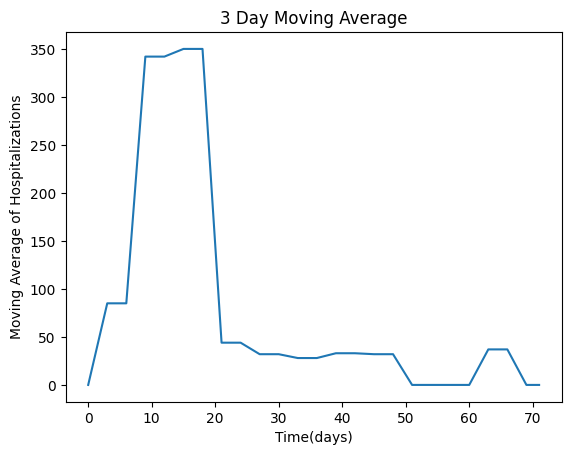

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df =pd.read_csv('/Users/averydrennan/ParticleFilter/PF_Estimation/data_sets/filtered_expanded_data.csv')

three_day_moving_average = df.loc[:,'3_day_moving_avg']
three_day_moving_average = three_day_moving_average.to_numpy()

print((three_day_moving_average))
plt.title("3 Day Moving Average")
plt.ylabel("Moving Average of Hospitalizations")
plt.xlabel("Time(days)")
plt.plot(three_day_moving_average)


pd.DataFrame(three_day_moving_average).to_csv('../data_sets/3_day_moving_average.csv')





The data set above didn't well fit with the particle filter, despite the trying the moving averages the data set seemed too inconsistent to describe the data with the given state model and parameters. 

The data set for the whole of Arizona, while not a perfect representation of Maricopa, provides a decent approximation considering that Maricopa county represents 5/7 of the total population of Arizona. Running the IF2(Iterated filtering) algorithm on the CDC dataset for the whole of Arizona yields an estimated $\beta$ of 0.108 with 200 iterations of runtime. 

We have a closed form expression for $\beta$ namely $\alpha_0\exp(\alpha_1x_1 + \alpha_2x_2)$. We can therefore optimize this expression with respect to the weights $\alpha_k$. To do so I used the Scipy gradient descent optimization to optimize the following expression. 

$({\alpha_0\exp(\alpha_1x_1 + \alpha_2x_2)})^2 - \beta^2$

We are trying to optimize so that the difference between the terms approaches 0. 

In [41]:
from scipy.optimize import minimize,fmin
import numpy as np

x1 = 0.5
x2 = 0.1
def func(a): 
    return np.abs(((a[0] * np.exp(a[1] * x1 + a[2] * x2))) - (0.108))

def SDH(a):
    return (a[0] * np.exp(a[1] * x1 + a[2] * x2))

result = minimize(func,x0=(0.5,0.5,0.5)); 



print(result)

print(SDH([ 9.683e-02,  1.330e-01,  4.266e-01]))



  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.3173471063998576e-09
        x: [ 9.683e-02  1.330e-01  4.266e-01]
      nit: 4
      jac: [ 1.115e+00  5.400e-02  1.080e-02]
 hess_inv: [[ 1.385e-02 -9.749e-02 -1.950e-02]
            [-9.749e-02  7.247e-01 -5.506e-02]
            [-1.950e-02 -5.506e-02  9.890e-01]]
     nfev: 266
     njev: 64
0.10799844875305646
